# Mini Project 3
##### by Jacynn

## Superstore Marketing Campaign Dataset

A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only 499 dollar (usually 999 dollar on other days). It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. 

Objective: The superstore wants to make a predictive model to predict the probability of a customer who might purchase the offer and wants to identify the different factors which affect the customer's response.

##### Data description:
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained in the last 2 years
- Dt_Customer - date of customer's enrollment with the company 
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts   - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Recency - number of days since the last purchase

In [83]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Task 2

### EDA

In [84]:
#Read dataset & check head
store = pd.read_csv('superstore_data.csv').iloc[:,1:]
store.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,34,2,3,1,2,7,1,0


In [85]:
#Find shape
store.shape

(2240, 21)

In [86]:
#Describe dataset
store.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [87]:
#Check infomation and types of dataset
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [88]:
#Dt_Customer - date of customer's enrollment with the company
store['Dt_Customer'] = store['Dt_Customer'].apply(lambda x: pd.Timestamp(x).timestamp())

In [89]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   float64
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [90]:
#Check if there is any null data
store.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [91]:
income_mean = store.Income.mean()
income_mean

52247.25135379061

In [92]:
#Replacing null income with mean income
store['Income'].replace((np.nan, income_mean), inplace=True)
store.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [93]:
#Get dummies variables for the categorical variables
store_dum = pd.get_dummies(data = store, columns = ['Education','Marital_Status'], 
                               prefix = ['Education','Marital_Status'] )
store_dum.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1970,84835.0,0,0,1.402877e+09,0,189,104,379,111,...,0,0,0,0,1,0,0,0,0,0
1,1961,57091.0,0,0,1.402790e+09,0,464,5,64,7,...,0,0,0,0,0,0,1,0,0,0
2,1958,67267.0,0,1,1.399939e+09,0,134,11,59,15,...,0,0,0,0,0,1,0,0,0,0
3,1967,32474.0,1,1,1.415146e+09,0,10,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1989,21474.0,1,0,1.407110e+09,0,6,16,24,11,...,0,0,0,0,0,0,1,0,0,0


In [94]:
#Find shape
store_dum.shape

(2240, 32)

## Task 1
### Split Data

In [95]:
X=store_dum.drop(columns=['Response'])
y=store_dum['Response']

In [96]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [97]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

## Task 2

### K-Means
Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variatio within clusters, the more homogeneous (similar) the data points are within the same cluster.

Pros: Fast, robust and easier to understand; g  ives better results when a dataset is distict or well separated from each other.

Cons: Requires the specification of the number of cluster centres; will not be able to split data if there are overlapping data; not invariant to non-linear transformations.

In [98]:
kmeans = KMeans(n_clusters=2, random_state=4)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=4)

In [99]:
#Get labels for the model
labels=kmeans.labels_
labels

array([0, 1, 1, ..., 1, 0, 0])

### Elbow method for optimal K

In [100]:
K=range(1,8)
wss=[]

for k in K:
    kmeans_em = KMeans(n_clusters=k)
    kmeans_em = kmeans_em.fit(X_scaled)
    wss_iter = kmeans_em.inertia_
    wss.append(wss_iter)

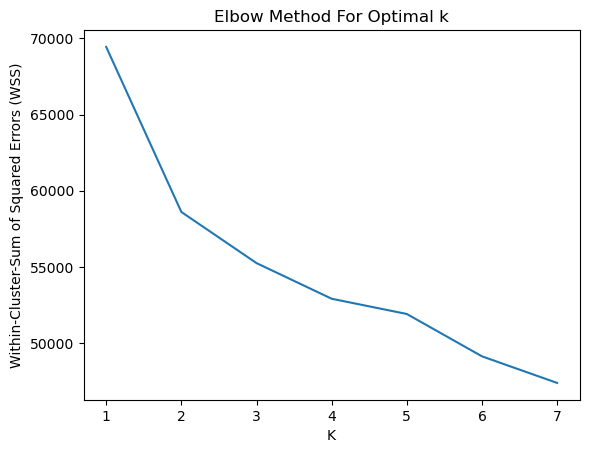

In [101]:
#Plot graph
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.title('Elbow Method For Optimal k')
plt.plot(K,wss)
plt.show()

The above graph shows that the optimal K is 2, which is what we assumed as our target variable (response) will be only be either accepted or rejected the offer in the last campaign.

### PCA

In [102]:
# Create an instance of PCA
pca = PCA()

# Fit Xs
pca.fit_transform(X_scaled)

array([[ 4.35811579e+00, -2.28734243e+00,  6.81826686e-01, ...,
        -2.20585523e-01,  1.35930959e-14, -1.30954934e-15],
       [ 2.56160181e-01, -6.39328684e-01, -1.46730352e-01, ...,
         8.55423392e-02, -2.38859801e-15, -1.02470035e-16],
       [-2.27106945e-01, -1.88389286e-01, -5.67253914e-01, ...,
        -2.10776606e-01, -2.30089714e-15,  1.13482921e-15],
       ...,
       [-1.38499248e+00,  4.89952695e-03,  2.04144727e+00, ...,
         2.01702456e-01, -6.83176746e-16, -1.32052309e-16],
       [ 3.80244684e+00, -2.03715192e+00,  1.25303489e+00, ...,
         2.28677220e-01, -5.46786892e-16,  9.36658753e-17],
       [ 2.43999269e+00,  2.19595674e+00,  3.66974097e-01, ...,
         9.44623811e-01,  1.38655546e-15,  1.90377854e-16]])

In [103]:
exp_var_pca = pca.explained_variance_ratio_

In [104]:
cum_sum_eig = np.cumsum(exp_var_pca)

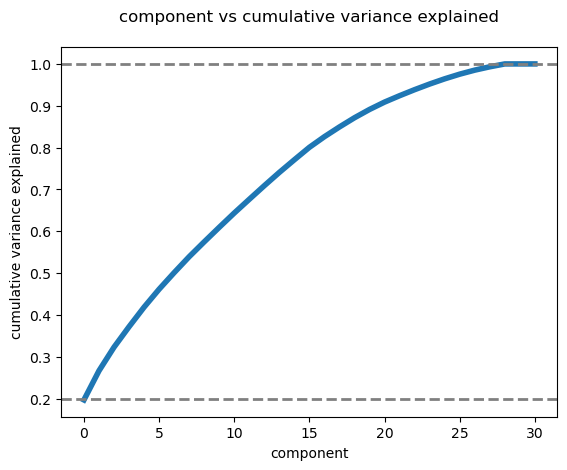

In [138]:
#Create visualization plot
plt.plot(range(0,len(cum_sum_eig)),cum_sum_eig, lw=4)
plt.axhline(y=0.2, linewidth=2, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=2, color='grey', ls='dashed')
plt.xlabel('component')
plt.ylabel('cumulative variance explained')
plt.title('component vs cumulative variance explained\n')
plt.show()

The graph above starts levelling out at about 28 components. There are 32 columns (31 components excluded the target variable) in total, so using all components and reduce it to 28 components does not affect too much. 

#### PCA in 2 dimensions

In [106]:
pca_2d = PCA(n_components=2, random_state=42)
pca_2d.fit(X_scaled)
X_pca_array = pca_2d.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
415,3.003651,-1.649036
1944,1.007793,2.118001
1089,0.688318,2.787950
1843,1.976808,1.973680
1023,2.859457,-0.170651


In [107]:
df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = labels
df_plot['Response'] = y # also add actual labels so we can use it in later plots
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,Response
1154,-1.911627,2.324532,1,0
424,-0.396388,0.391872,1,0
234,-2.573790,-1.208558,1,1
1707,-2.518398,0.634740,1,0
1794,-2.339259,-1.723444,1,0


In [108]:
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (6,6))

    # color map
    cmap = matplotlib.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(2-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=20) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA)");

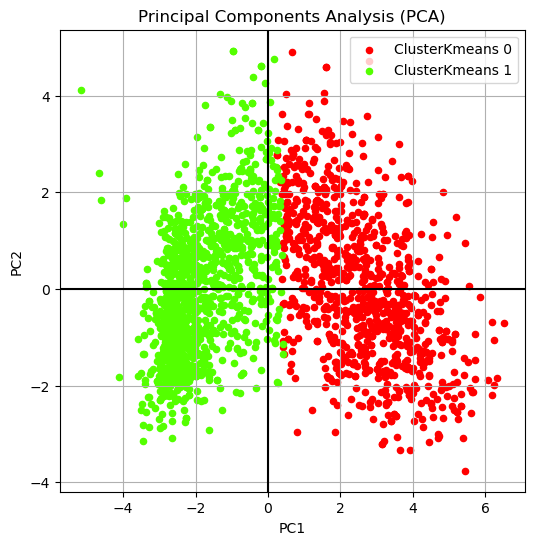

In [109]:
plotData(df_plot, 'ClusterKmeans')

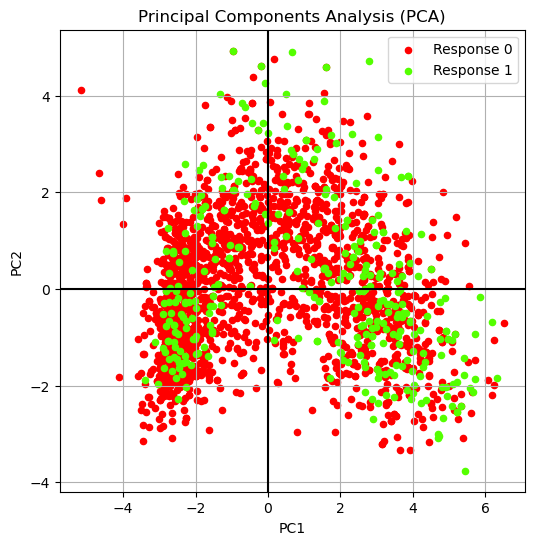

In [110]:
plotData(df_plot, 'Response')

These dimensions (PC1 and PC2) are the principal components, which pick out the directions of maximal variation in the original data. PC1 finds the most variation and PC2 the second-most, the rest of the data us basically thrown away when the data is reduced down to 2D.

From the two graphs above, we can noticed that they both have totally different clustering. Kmeans clustering has 2 clusters spread left and right; while with the 'actual' labels data 2 clusters are spread overlapping. When reducing the features with PCA and mashes the data down into 2 dimensions (2D), infomation could be lost, and thus this could be the reason that k-means clustering did not find out the same clusterings as the actual data. 

## Task 3

### Logistic Regression

In [111]:
log = LogisticRegression(max_iter=10000)

# Fit Model
log.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [112]:
# Score
print('Train Log score: ', log.score(X_train, y_train))
print('Validation Log score: ',log.score(X_val, y_val))

Train Log score:  0.8638392857142857
Validation Log score:  0.8727678571428571


In [113]:
y_pred = log.predict(X_val)

#confusion matrix
confusion_matrix(y_val, y_pred)

array([[375,   8],
       [ 49,  16]], dtype=int64)

In [114]:
#classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       383
           1       0.67      0.25      0.36        65

    accuracy                           0.87       448
   macro avg       0.78      0.61      0.64       448
weighted avg       0.85      0.87      0.85       448



### Grid Search 

In [115]:
log_params = {
    'penalty': ['l2'],
    'C': [0.001,0.01,0.1,1.0]
}

In [116]:
gsc = GridSearchCV(LogisticRegression(max_iter=10000), log_params, cv=10, verbose=1)
gsc.fit(X_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0], 'penalty': ['l2']},
             verbose=1)

In [117]:
print(gsc.best_params_)
print(gsc.best_score_)

{'C': 0.01, 'penalty': 'l2'}
0.8608789386401327


In [118]:
print('GSC Train Log score: ', gsc.score(X_train, y_train))
print('GSC Validation Log score: ', gsc.score(X_val, y_val))

GSC Train Log score:  0.8660714285714286
GSC Validation Log score:  0.8504464285714286


###### Before GridSearch: 
Train score: 0.8638; Validation score: 0.8727

The scores do not changes too much after GridSearch, and so no modification on parameters in the model. 

### Prediction on Test Set

In [119]:
#Score
print('Test Log score: ',log.score(X_test, y_test))

Test Log score:  0.8571428571428571


In [120]:
y_pred = log.predict(X_test)

#confusion matrix
confusion_matrix(y_test, y_pred)

array([[362,   9],
       [ 55,  22]], dtype=int64)

In [121]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       371
           1       0.71      0.29      0.41        77

    accuracy                           0.86       448
   macro avg       0.79      0.63      0.66       448
weighted avg       0.84      0.86      0.83       448



### ROC Curve

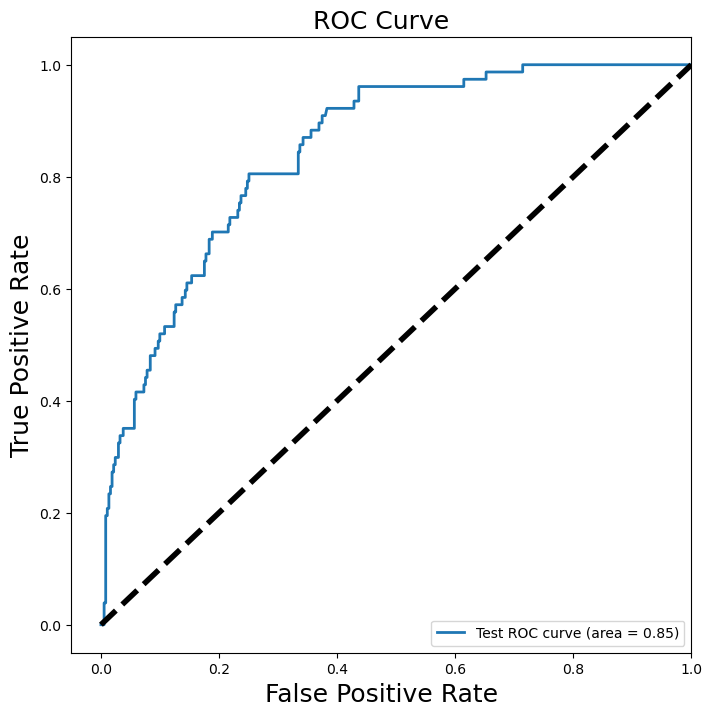

In [122]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
y_test_pp = log.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pp, pos_label=1)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_test_auc = metrics.auc(test_fpr, test_tpr)

# Plot ROC Curve
plt.figure(figsize=[8,8])
plt.plot(test_fpr, test_tpr, lw = 2, label = 'Test ROC curve (area = %0.2f)' % roc_test_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### K-Means on Test Set

In [123]:
kmeans_test=KMeans(n_clusters=2, random_state=42)
kmeans_test.fit(X_test)

KMeans(n_clusters=2, random_state=42)

In [124]:
#Get labels for model
labels_test=kmeans_test.labels_
labels_test

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [125]:
#Check shape
X_test.shape, y_test.shape

((448, 31), (448,))

In [126]:
#Create dictionary with target variable
data={'actual':y_test, 'predicted':labels_test}

In [127]:
#Create dataframe
compare_df=pd.DataFrame(data)
compare_df

,actual,predicted
779,0,1
389,0,1
510,0,0
1553,0,0
1172,0,0
...,...,...
1812,0,0
192,0,0
1878,0,0
2035,1,1


In [128]:
#Find out if actual and predicted results match
compare_df['results']=np.where((compare_df['actual']==compare_df['predicted']), 'true', 'false')
compare_df

,actual,predicted,results
779,0,1,false
389,0,1,false
510,0,0,true
1553,0,0,true
1172,0,0,true
...,...,...,...
1812,0,0,true
192,0,0,true
1878,0,0,true
2035,1,1,true


In [129]:
#Calculate total 'true' and 'false' in the results
compare_df['results'].value_counts()

true     294
false    154
Name: results, dtype: int64

In [130]:
#Calculate the percentage if model predicted correctly
percentage=294/448*100
percentage

65.625

## Conclusion
Based on the ROC curve, the area under the curve is 0.85. The accuracy score in the test data is 0.8571. Logistic regression did a good prediction on the target variable, it gives a 85.7% predicting correctly whether the customers accepted or rejected the offer in the last campaign.

Based on KMeans model, there is only 65.6% that the model will predict correctly if customers accepted or rejected the offer in the last campaign. 


### Reference
https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset